<a href="https://colab.research.google.com/github/number-of-sheep/Neural-Style-Transfer/blob/main/Neural_Style_Transfer_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural_Style_Transfer

In [24]:
# 구글에서 만든 딥러닝 기능 제공 라이브러리
import tensorflow as tf

# 파이썬 작업환경에서 자료를 띄우기 위함
import IPython.display as display

# 그래프를 그리기 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl

# 데이터 분석 시 수치계산을 위해 활용 (벡터 및 행렬 연산)
import numpy as np

# Python Image Library
import PIL.Image

import time

# 고차 함수를 위한 라이브러리
import functools

In [2]:
# rcParams를 통해 그래프의 기본 세팅을 정의함
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

In [3]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [19]:
# 기본이 되는 두 이미지를 가져옴
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = '/content/image.jpg'

In [20]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [21]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

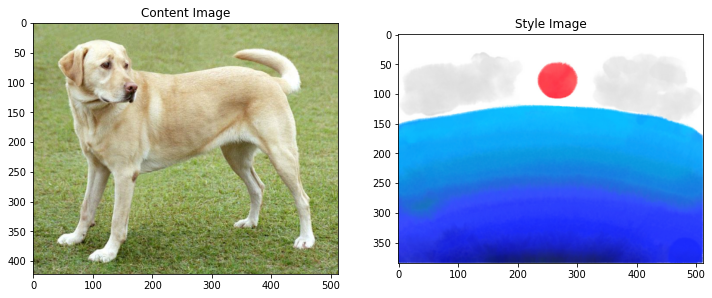

In [22]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

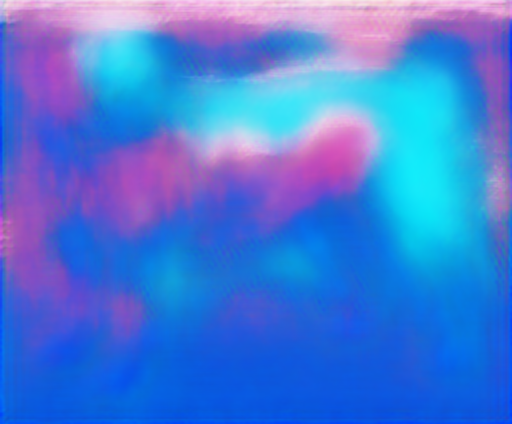

In [23]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)